# Model from agentframework : Communicating!

## Practical 7 : interaction between agents

This practical considers ways agents have to communicate, in the same way as with the environment. 
The key concepts covered are : 
- creation of agent community that can share information on and modify others' attributes : method share_with_neighbors(neighborhood) and agents list as agent attribute.
- defining key arguments to run the model in command line with sys (practical 6 should have also covered this). 
- jupyter notebook options to organise and comment code.


In [1]:
import random as rd
import agentframework7 as ag
import csv
import matplotlib.pyplot as plt
import sys

#### Global Enivronment 

In [2]:
#read the text file in csv and put it into a list to be able to plot it.        
with open('in.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    environment=[]
    for row in csv_reader:
        rowlist=[]
        for value in row:
            rowlist.append(int(value))
        environment.append(rowlist)

#### Global variables for model and simulation 

In [3]:
#create global variables for the model with default values

#number of agents in the model
number_agents=100
#number of times to run the model(methods)
number_iterations=10
#ray for neighborhood
neighborhood=10


#use arguments specified in python command line : this will not execute properly in jupyter.
arguments = len(sys.argv) - 1
if arguments>0:
    # output arguments
    if float(sys.argv[1])>0:
        number_iterations=int(sys.argv[1])
    else :
        print('The iteration argument is not a valid number of iterations, default will be used.')
    
    if float(sys.argv[2])>0:
        number_agents=int(sys.argv[2])
    else :
        print('The agent argument is not a valid number of agents, default will be used.')
    
    if float(sys.argv[3])>0:
        neighborhood=float(sys.argv[3])
    else :
        print('The agent argument is not a valid distance, default will be used.')
    if arguments >3:
        print('Too many arguments have been given, only the first 3 will be considered.')
else :
    print('default running.')


ValueError: could not convert string to float: '-f'

#### Agent creation

In [4]:
#create number_agents of agents from agentframework7 class Agent, adding environment to the arguments and the list of agents being created.
#We note this list does not need to be full when added, so we can prograssively fill it up as agents are being created. 
agents=[]
for i in range (number_agents):
    agents.append(ag.Agent(environment,agents))
    #no argument in Agent yet



In [5]:
#check the agents have been added as arguments to agents
print(agents[0]) 

y:179
x:145
store:0
100 other agents share the same environment
neighbors: 0


#### Getting the model to work

In [6]:
#save the amount stored by agents after num_iterations in a file    
def add_store_info(list_agents,num_iter,num_agents,file_name='store_file'):
    '''
    Append the values of store for all agents after a number of iterations.
    '''
    #create the storage row
    storage=[num_iter,num_agents]+[list_agents[i].store for i in range(num_agents)]
    
    #append it to existing doc
    with open(file_name+'.csv', mode='a') as store_file:#the 'a' writing enables appending to existing file
        storage_writer = csv.writer(store_file, delimiter=',')
        storage_writer.writerow(storage)#store the data in one row    

#save the new environment into a new csv file        
def update_environment(environment,num_iter, num_agents,file_name='environment_after_update'):
    '''
    Update possible existing file with new values for environment.
    '''
    f2 = open(file_name+'.csv', 'w', newline='')#the 'w' will overwrite the exiting environment file
    writer = csv.writer(f2, delimiter=',')
    writer.writerow(['num_iterations','num_agents'])
    writer.writerow([num_iter,num_agents])
    for row in environment:
        writer.writerow(row) # List of values.
    f2.close()



In [26]:
#move them number_iterations times :


for j in range (number_iterations):
    sharing=0
    for i in range(number_agents):
        agents[i].move()
        agents[i].eat()
        #share with a certain probability, here 25% chance:
        if rd.random()<0.25:
            agents[i].share_with_neighbors(neighborhood)
            #keep count of sharing transactions:
            if len(agents[i].neighbors)>1:
                sharing+=1
        #if agents eat too much, give back to environment:
        if agents[i].store > 100:
            agents[i].give_it_up()
    #summary of interactions in round j
    print(str(sharing)+' contacts in this round')
    #randomly shuffle list so as to not visit the agents in the same order at each iteration. 
    rd.shuffle(agents)

#keep an account of the store for all agents after number_iteration of moves and eats and put new model values into cvs files:
add_store_info(agents,number_iterations,number_agents)
update_environment(environment,number_iterations,number_agents)

29 contacts in this round
22 contacts in this round
26 contacts in this round
27 contacts in this round
20 contacts in this round
24 contacts in this round
31 contacts in this round
25 contacts in this round
17 contacts in this round
21 contacts in this round


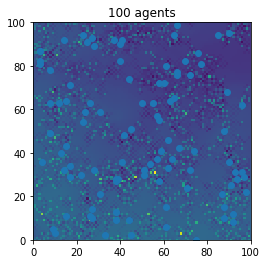

In [27]:
#plot all the agents on the grid
plt.xlim(0,100)
plt.ylim(0,100)
plt.imshow(environment)
plt.scatter([agents[i].x for i in range (number_agents)],[agents[i].y for i in range (number_agents)])
plt.title(str(number_agents)+' agents')
plt.show()
#or use a loop to go through all the agents